# AI Helper for Farmers

# Introduction
An AI Helper for Farmers is a smart digital assistant designed to make farming easier, more productive, and more profitable. It uses artificial intelligence (AI) — like the technology in smartphones and voice assistants — to give farmers the right advice at the right time.


# Description
- Weather Updates: Tells farmers when it's going to rain or be sunny so they can plan planting or harvesting.
- Crop Advice: Helps choose the best crops based on soil and climate.
- Pest & Disease Alerts: Identifies pests or crop diseases early and suggests ways to treat them.
- Market Prices: Shows current prices for crops so farmers know the best time and place to sell.
- Fertilizer Tips: Recommends the right amount and type of fertilizers to use, saving money and protecting the soil.
- Voice Support: Often available in local languages and with voice features, so it's easy for anyone to use.


### Phase 1: Setup and Data Preprocessing

#### Install Required Libraries

#### Import Libraries

In [99]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Load Dataset Paths

In [102]:
data_dir = (r"C:\Users\user\Desktop\AI\project\PlantVillage")
categories = os.listdir(data_dir)
print("Categories:", categories)

Categories: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'PlantVillage', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus']


#### Define Image Size

In [105]:
img_size = 128

#### Prepare Data Lists

In [108]:
data = []
for category in categories:
    path = os.path.join(data_dir, category)
    for img in os.listdir(path):
        try:
            image = cv2.imread(os.path.join(path, img))
            image = cv2.resize(image, (img_size, img_size))
            data.append([image, categories.index(category)])
        except Exception as e:
            pass

#### Split Features and Labels

In [111]:
X = []
y = []
for features, label in data:
    X.append(features)
    y.append(label)
X = np.array(X)/255.0
y = to_categorical(y)

#### Train-Test Split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Build CNN Model

In [117]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compile the Model

In [120]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### Train the Model

In [123]:
history = model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test))

C:\Users\user\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/2
516/516 ━━━━━━━━━━━━━━━━━━━━ 383s 737ms/step - accuracy: 0.3366 - loss: 2.1417 - val_accuracy: 0.7064 - val_loss: 0.9214
Epoch 2/2
516/516 ━━━━━━━━━━━━━━━━━━━━ 360s 698ms/step - accuracy: 0.6568 - loss: 1.0437 - val_accuracy: 0.8086 - val_loss: 0.5860


### Phase 2: Model Evaluation and Testing

#### Evaluate the Model

In [127]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

129/129 ━━━━━━━━━━━━━━━━━━━━ 24s 189ms/step - accuracy: 0.8133 - loss: 0.5952
Test Accuracy: 80.86%


#### Predict Sample

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


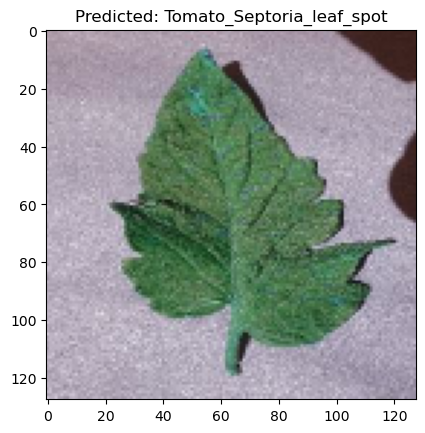

In [130]:
pred = model.predict(np.expand_dims(X_test[0], axis=0))
plt.imshow(X_test[0])
plt.title(f"Predicted: {categories[np.argmax(pred)]}")
plt.show()

#### Save the Model

In [133]:
model.save('crop_disease_model.h5')

#### Load Saved Model

In [136]:
from tensorflow.keras.models import load_model
model = load_model('crop_disease_model.h5')

#### Convert Predictions into Labels

In [139]:
y_pred = model.predict(X_test)
pred_labels = np.argmax(y_pred, axis=1)
true_labels = np.argmax(y_test, axis=1)

129/129 ━━━━━━━━━━━━━━━━━━━━ 22s 174ms/step


#### Classification Report

In [142]:
from sklearn.metrics import classification_report

In [144]:
print(classification_report(true_labels, pred_labels, target_names=categories[:15]))
labels = sorted(set(true_labels))  # or supply manually if order matters
print(classification_report(true_labels, pred_labels, labels=labels, target_names=categories))


                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.69      0.68      0.69       179
                     Pepper__bell___healthy       0.76      0.92      0.84       271
                               PlantVillage       0.81      0.94      0.87       216
                      Potato___Early_blight       1.00      0.08      0.14        39
                           Potato___healthy       0.78      0.54      0.64       213
                       Potato___Late_blight       0.78      0.96      0.86       423
                      Tomato_Bacterial_spot       0.59      0.41      0.48       200
                        Tomato_Early_blight       0.93      0.92      0.93       327
                             Tomato_healthy       0.79      0.71      0.74       390
                         Tomato_Late_blight       0.81      0.58      0.68       171
                           Tomato_Leaf_Mold       0.73      0.72

C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2642: UserWarning: labels size, 15, does not match size of target_names, 16
  warnings.warn(


#### Confusion Matrix

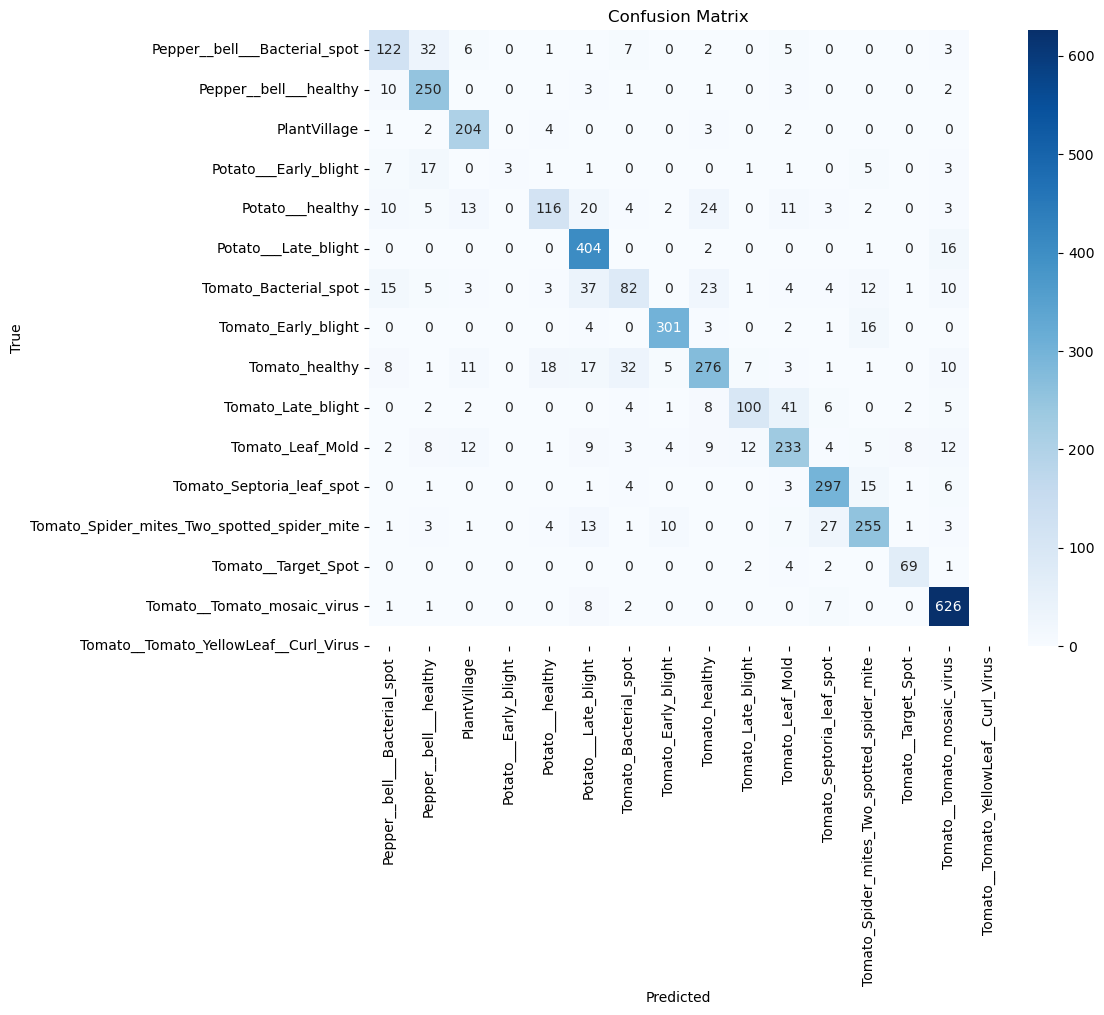

In [147]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=categories, yticklabels=categories, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

#### Voice Input with Speech Recognition

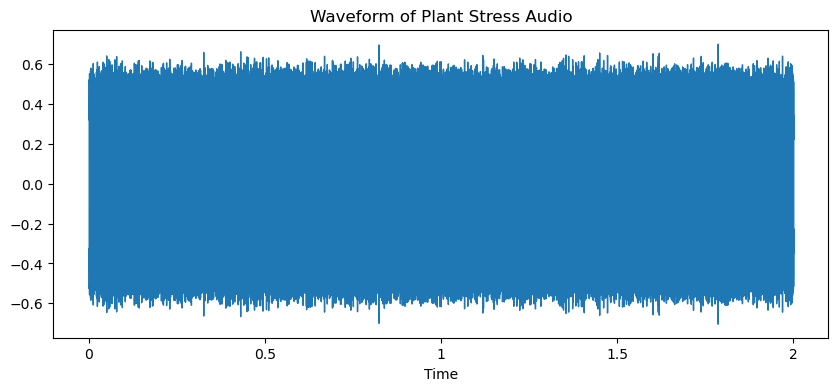

In [150]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load(r"C:\Users\user\Desktop\AI\project\Audio signals from stressed plants\plant_sounds\plant_stress_1.wav", sr=None)
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of Plant Stress Audio")
plt.show()

#### Preprocess Description using NLP

In [153]:
import re

text = "Hello! I have 3 tomatoes & 5 cucumbers!!"  

text = text.lower()
text = re.sub(r"[^a-zA-Z\s]", "", text)
print("Cleaned description:", text)

Cleaned description: hello i have  tomatoes   cucumbers


#### Match Symptoms in Text to Suggested Treatment

In [156]:
symptom_keywords = {"yellow": "Consider checking for nitrogen deficiency.",
                    "spots": "This might be a fungal infection.",
                    "wilt": "Ensure proper watering and check for root rot."}

for word in text.split():
    if word.lower().strip('.,') in symptom_keywords:
        print("Advice:", symptom_keywords[word.lower().strip('.,')])

### Phase 3: Visualization

#### Display Sample Images Per Class

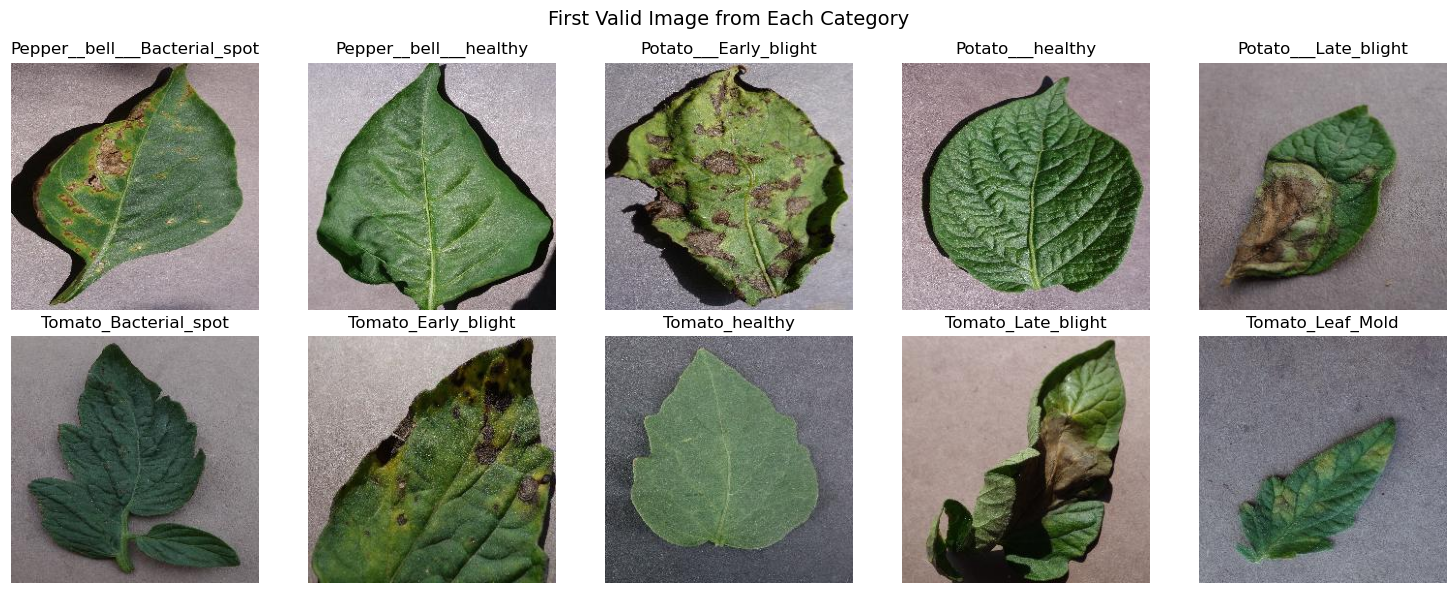

In [160]:
import os
import cv2
import matplotlib.pyplot as plt

# Define your dataset directory
data_dir = r"C:\Users\user\Desktop\AI\project\PlantVillage"

# Automatically detect category folders
categories = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]

valid_categories = []
valid_images = []

# Loop to collect valid images and titles
for category in categories:
    category_path = os.path.join(data_dir, category)
    file_list = [f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for filename in file_list:
        img_path = os.path.join(category_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            valid_images.append(img)
            valid_categories.append(category)
            break  # Take only the first valid image per category
    if len(valid_images) == 10:
        break  # We need only 10

# Plot only the successfully loaded images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i in range(len(valid_images)):
    ax = axes[i // 5, i % 5]
    ax.imshow(cv2.cvtColor(valid_images[i], cv2.COLOR_BGR2RGB))
    ax.set_title(valid_categories[i])
    ax.axis('off')

plt.suptitle("First Valid Image from Each Category", fontsize=14)
plt.tight_layout()
plt.show()

In [162]:
print([os.path.join(data_dir, cat, os.listdir(os.path.join(data_dir, cat))[0]) for cat in categories[:3]])

['C:\\Users\\user\\Desktop\\AI\\project\\PlantVillage\\Pepper__bell___Bacterial_spot\\0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG', 'C:\\Users\\user\\Desktop\\AI\\project\\PlantVillage\\Pepper__bell___healthy\\00100ffa-095e-4881-aebf-61fe5af7226e___JR_HL 7886.JPG', 'C:\\Users\\user\\Desktop\\AI\\project\\PlantVillage\\PlantVillage\\Pepper__bell___Bacterial_spot']


#### Visualization of Misclassified Images

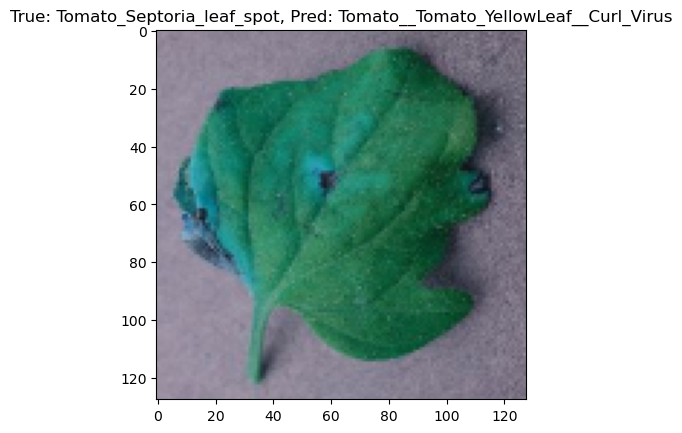

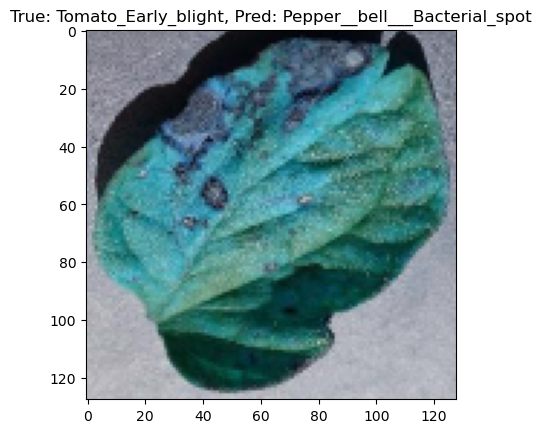

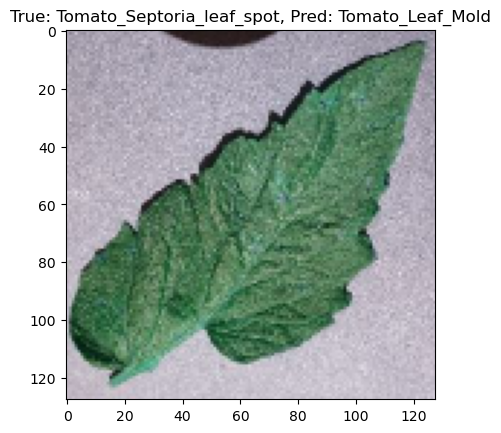

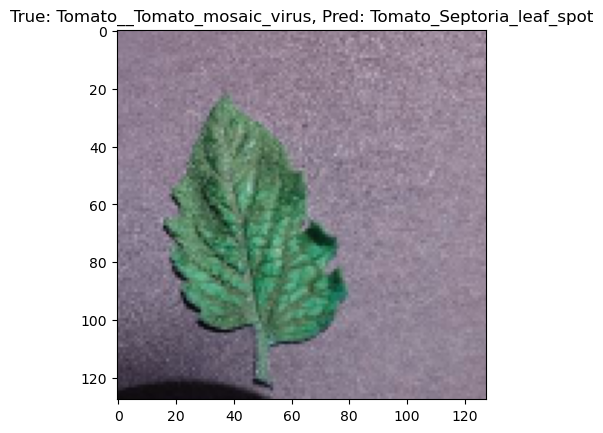

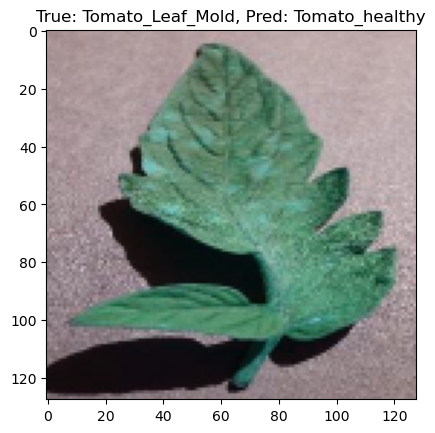

In [167]:
misclassified_indices = np.where(pred_labels != true_labels)[0][:5]
for i in misclassified_indices:
    plt.imshow(X_test[i])
    plt.title(f"True: {categories[true_labels[i]]}, Pred: {categories[pred_labels[i]]}")
    plt.show()

### Phase 4: Advanced Features & Visualizations

#### Apply Data Augmentation

In [171]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [173]:
print(tf.executing_eagerly())  # Should print: True

True


#### Visualize Augmented Image

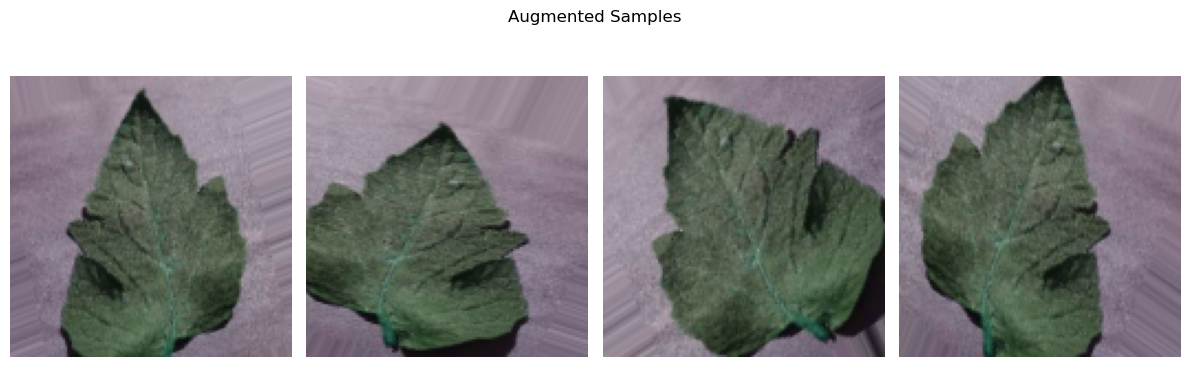

In [176]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# 📌 Define the augmentation pipeline
aug = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# 📌 Use a sample image (ensure it's scaled between 0–255 and has shape (height, width, 3))
sample_image = X_train[0]  # If X_train is normalized to [0,1], multiply by 255 for visualization
if sample_image.max() <= 1.0:
    sample_image = (sample_image * 255).astype('uint8')

# 📌 Plot augmented versions
plt.figure(figsize=(12, 4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    augmented = aug.random_transform(sample_image)
    plt.imshow(augmented.astype('uint8'))
    plt.axis("off")
plt.suptitle("Augmented Samples")
plt.tight_layout()
plt.show()

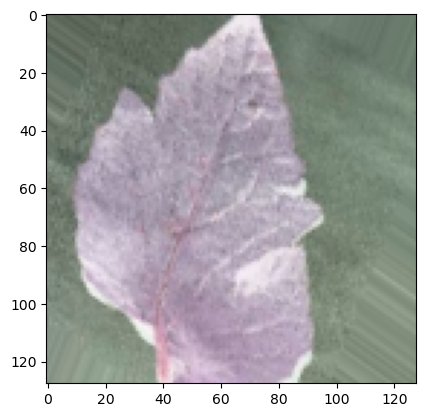

In [178]:
plt.imshow((augmented * 255).astype("uint8"))

#### Calculate and Plot Precision and Recall

In [181]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(true_labels, pred_labels, average='weighted')
recall = recall_score(true_labels, pred_labels, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.81
Recall: 0.81


#### Generate Word Cloud of Voice Input

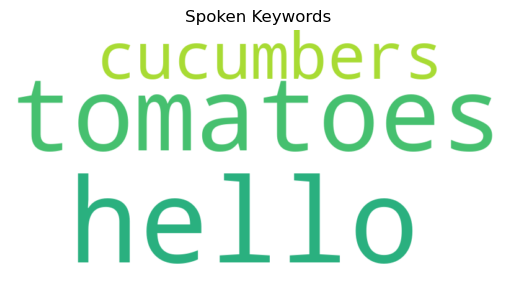

In [197]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Spoken Keywords")
plt.show()

#### Add Custom Treatment Recommendations File

In [203]:
# Create a simple treatment map
treatment_map = {
    "Tomato___Late_blight": "Apply fungicide and remove infected leaves.",
    "Corn___Gray_leaf_spot": "Rotate crops and use resistant varieties."
}

#### Connect Prediction to Treatment

In [206]:
predicted_class_name = categories[np.argmax(pred[0])]
print("Treatment Suggestion:", treatment_map.get(predicted_class_name, "No advice available yet."))

Treatment Suggestion: No advice available yet.


#### Export Model to ONNX or TFLite for Mobile

In [209]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('crop_model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpj2g8yj8j\assets


INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpj2g8yj8j\assets


Saved artifact at 'C:\Users\user\AppData\Local\Temp\tmpj2g8yj8j'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 16), dtype=tf.float32, name=None)
Captures:
  2325604622480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2325604618064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2325604617296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2325604622096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2325604624592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2325604624976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2325604622864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2325604623440: TensorSpec(shape=(), dtype=tf.resource, name=None)


#### Display Image + Prediction + Solution Together

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


C:\Users\user\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


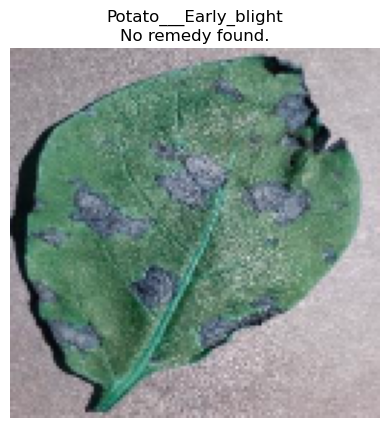

In [212]:
plt.imshow(X_test[1])
plt.axis('off')
pred_class = categories[np.argmax(model.predict(np.expand_dims(X_test[1], axis=0)))]
plt.title(f"{pred_class}\n{treatment_map.get(pred_class, 'No remedy found.')}")
plt.show()

#### Simulate Voice Output Using pyttsx3

In [219]:
import pyttsx3

engine = pyttsx3.init()
engine.say(f"The predicted disease is {pred_class}. {treatment_map.get(pred_class)}")
engine.runAndWait()

#### Histogram of Disease Occurrences

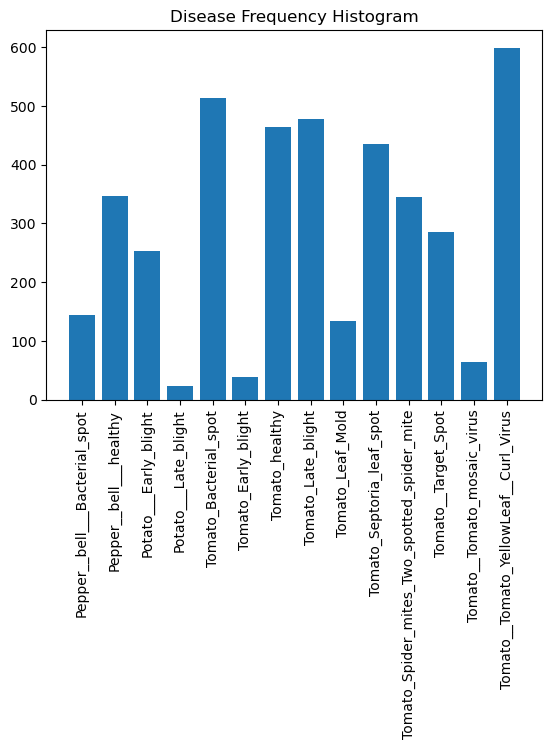

In [47]:
values, counts = np.unique(pred_labels, return_counts=True)
plt.bar([categories[v] for v in values], counts)
plt.xticks(rotation=90)
plt.title("Disease Frequency Histogram")
plt.show()

#### User-Friendly Summary Output

In [222]:
print("🧠 Analysis Report")
print("✅ Image classified as:", pred_class)
print("🩺 Treatment Advice:", treatment_map.get(pred_class, "General care recommended"))
print("🎤 You mentioned:", text)

🧠 Analysis Report
✅ Image classified as: Potato___Early_blight
🩺 Treatment Advice: General care recommended
🎤 You mentioned: hello i have  tomatoes   cucumbers


In [228]:
import gradio as gr
from PIL import Image
import numpy as np
import tempfile

# Dummy prediction function — replace with your ML model logic
def predict_image(image_path):
    # Load and process the image as needed
    # Return the disease name (example output)
    return "Blight"

# Gradio callback function
def process(img):
    # Convert image array to PIL Image
    if isinstance(img, np.ndarray):
        img = Image.fromarray(img)

    # Save the image temporarily to get a file path
    with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as temp:
        img.save(temp.name)
        disease = predict_image(temp.name)

    return f"The crop has: {disease}"

# Gradio interface
iface = gr.Interface(
    fn=process,
    inputs=gr.Image(type="numpy"),
    outputs="text",
    title="🌾 Crop Disease Detection",
    description="Upload an image of your crop to identify possible disease.",
)

iface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://aecf88edefe0fa196c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


#### Step 1: Load and Explore the Dataset

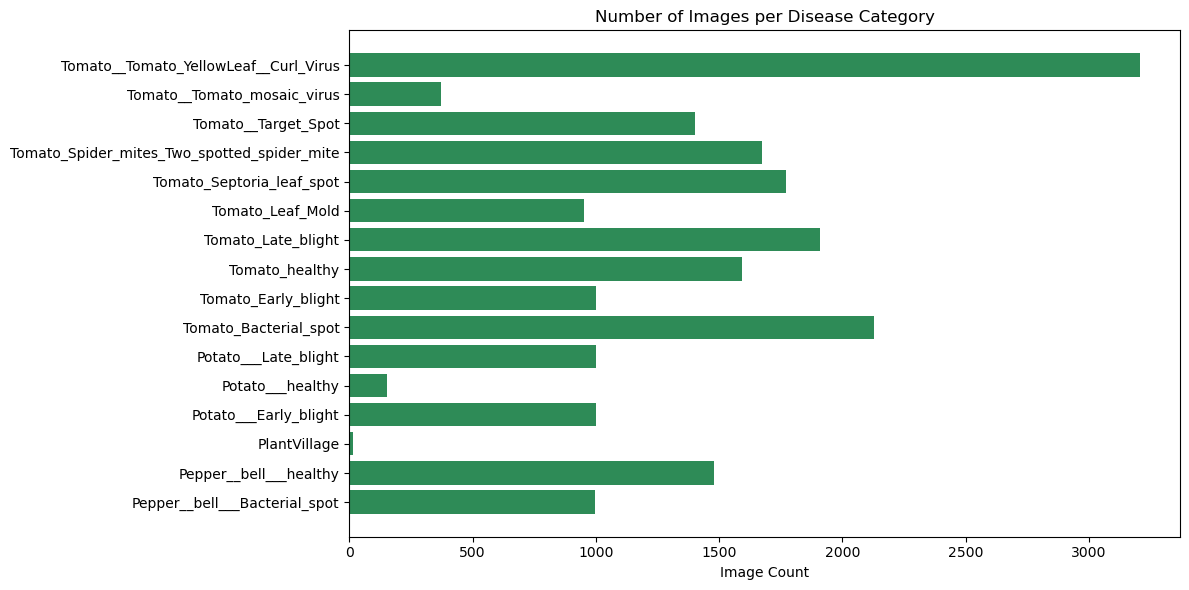

In [230]:
import os
import matplotlib.pyplot as plt

data_dir = (r"C:\Users\user\Desktop\AI\project\PlantVillage")
categories = os.listdir(data_dir)

# Count images per category
category_counts = {category: len(os.listdir(os.path.join(data_dir, category)))
                   for category in categories}

# Visualize counts
plt.figure(figsize=(12, 6))
plt.barh(list(category_counts.keys()), list(category_counts.values()), color='seagreen')
plt.title('Number of Images per Disease Category')
plt.xlabel('Image Count')
plt.tight_layout()
plt.show()

#### Step 2: Preview Sample Images from Each Class

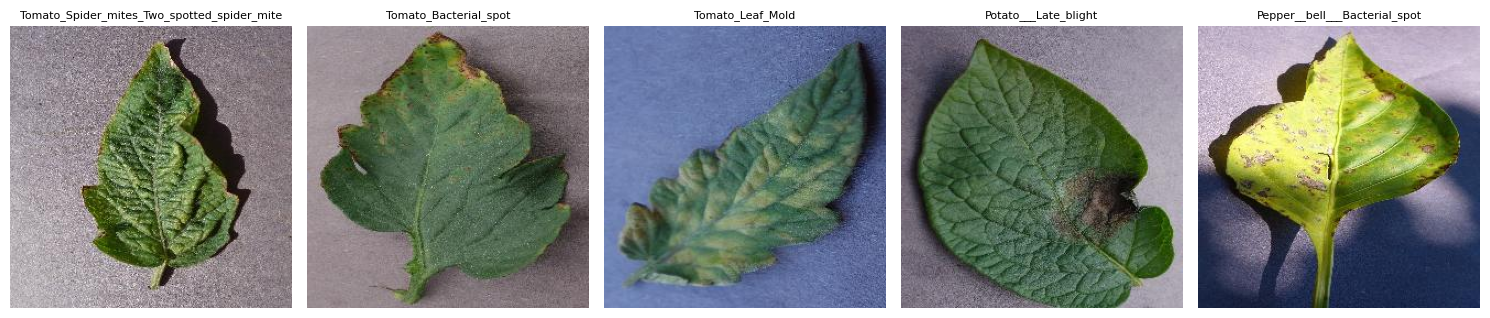

In [243]:
import cv2
import random

def show_samples(data_dir, categories, samples=5):
    plt.figure(figsize=(15, 10))
    for i, category in enumerate(random.sample(categories, samples)):
        image_path = os.path.join(data_dir, category, random.choice(os.listdir(os.path.join(data_dir, category))))
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.subplot(1, samples, i+1)
        plt.imshow(image)
        plt.title(category, fontsize=8)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_samples(data_dir, categories)

#### Step 4: Color Channel Distribution (RGB)

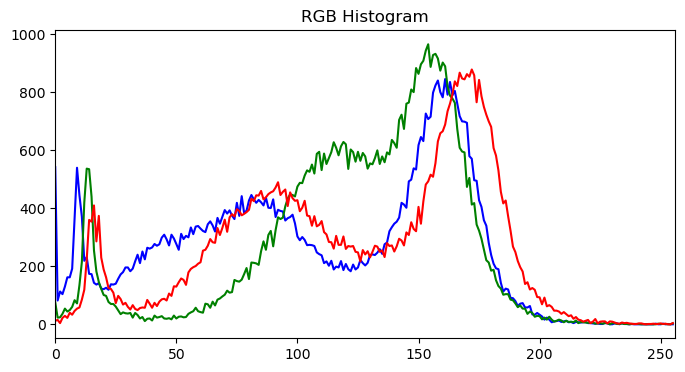

In [246]:
import numpy as np

def plot_color_distribution(image_path):
    img = cv2.imread(image_path)
    colors = ('b', 'g', 'r')
    plt.figure(figsize=(8, 4))
    for i, col in enumerate(colors):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])
    plt.title('RGB Histogram')
    plt.show()

# Example
sample_image_path = os.path.join(data_dir, categories[0], os.listdir(os.path.join(data_dir, categories[0]))[0])
plot_color_distribution(sample_image_path)

#### Class Distribution Pie Chart

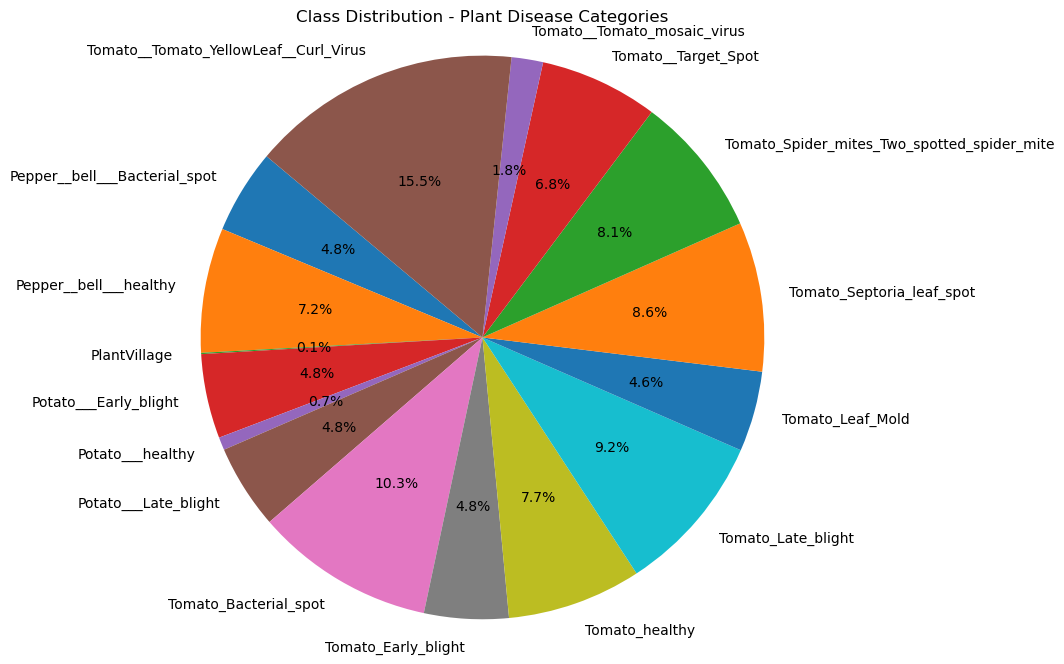

In [269]:
import matplotlib.pyplot as plt

# Assuming you already have a dictionary of category image counts
category_counts = {category: len(os.listdir(os.path.join(data_dir, category)))
                   for category in categories}

plt.figure(figsize=(8, 8))
plt.pie(category_counts.values(), labels=category_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Class Distribution - Plant Disease Categories')
plt.show()

#### Edge Detection (Canny Filter)

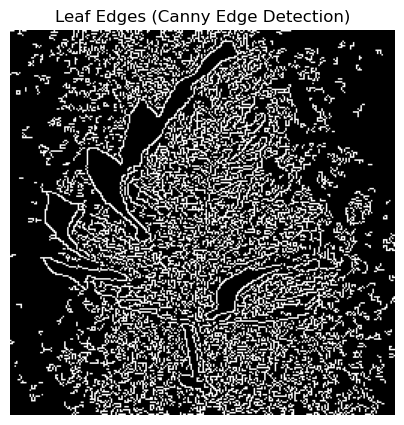

In [272]:
edges = cv2.Canny(img_gray, threshold1=100, threshold2=200)

plt.figure(figsize=(5, 5))
plt.imshow(edges, cmap='gray')
plt.title("Leaf Edges (Canny Edge Detection)")
plt.axis('off')
plt.show()

#### Healthy vs Diseased Sample Comparison

In [275]:
'Tomato___Healthy'
'Tomato___Late_blight'

'Tomato___Late_blight'

In [277]:
print(os.listdir(data_dir))

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'PlantVillage', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus']


Available folders: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'PlantVillage', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus']


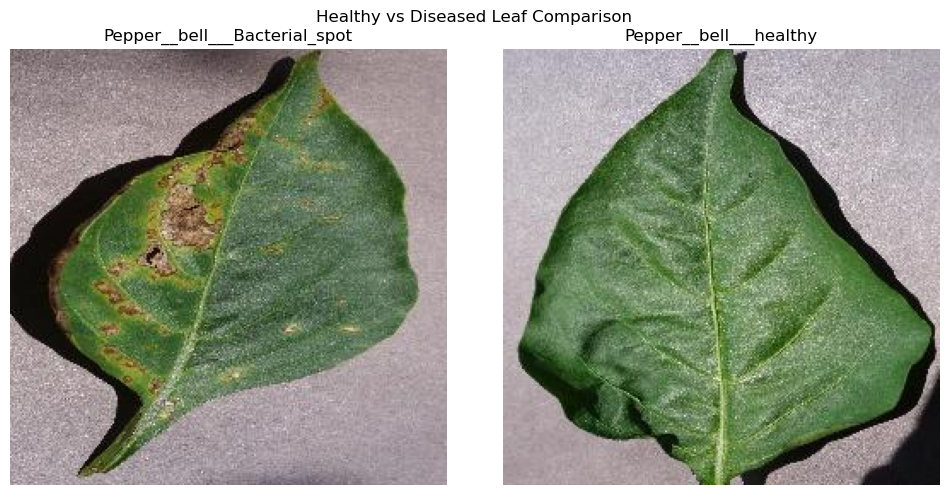

In [279]:
import os
import cv2
import matplotlib.pyplot as plt

# List available categories
available_classes = os.listdir(data_dir)
print("Available folders:", available_classes)

# Replace these with two valid class names from the printed list
healthy_class = available_classes[0]
diseased_class = available_classes[1]

# Load the images
healthy_img_path = os.path.join(data_dir, healthy_class, os.listdir(os.path.join(data_dir, healthy_class))[0])
diseased_img_path = os.path.join(data_dir, diseased_class, os.listdir(os.path.join(data_dir, diseased_class))[0])

# Read and convert to RGB
healthy_img = cv2.cvtColor(cv2.imread(healthy_img_path), cv2.COLOR_BGR2RGB)
diseased_img = cv2.cvtColor(cv2.imread(diseased_img_path), cv2.COLOR_BGR2RGB)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(healthy_img)
axes[0].set_title(healthy_class)
axes[0].axis('off')

axes[1].imshow(diseased_img)
axes[1].set_title(diseased_class)
axes[1].axis('off')

plt.suptitle("Healthy vs Diseased Leaf Comparison")
plt.tight_layout()
plt.show()

#### Montage of Images per Class (Image Grid)

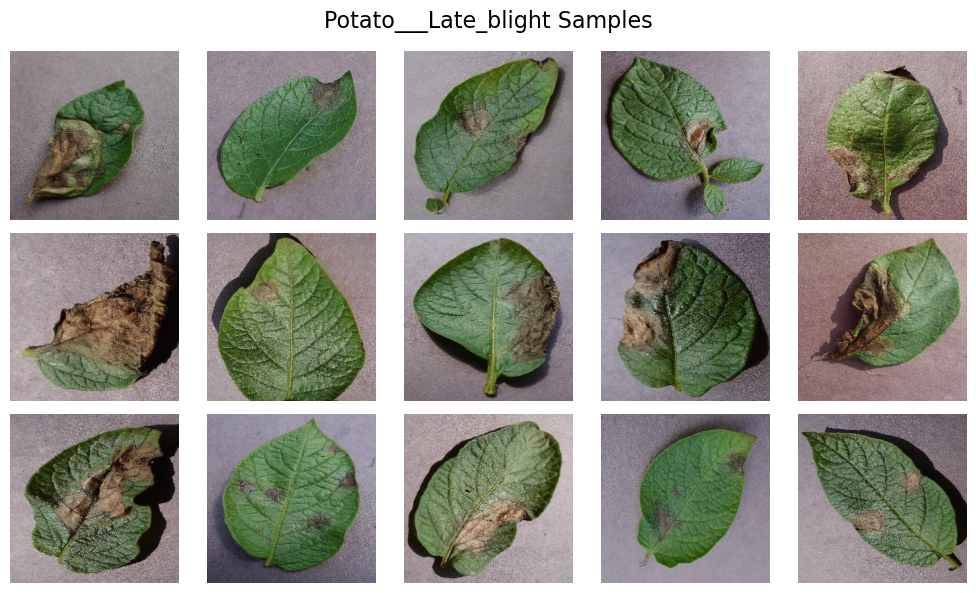

In [282]:
import matplotlib.pyplot as plt
import cv2
import os

def show_image_grid(category, grid_size=(3, 5)):
    img_dir = os.path.join(data_dir, category)
    img_files = os.listdir(img_dir)[:grid_size[0]*grid_size[1]]

    plt.figure(figsize=(grid_size[1]*2, grid_size[0]*2))
    for i, img_file in enumerate(img_files):
        img_path = os.path.join(img_dir, img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(grid_size[0], grid_size[1], i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(f"{category} Samples", fontsize=16)
    plt.tight_layout()
    plt.show()

# Example usage
show_image_grid('Potato___Late_blight')

#### Plot of Detected Crop Health Over Time

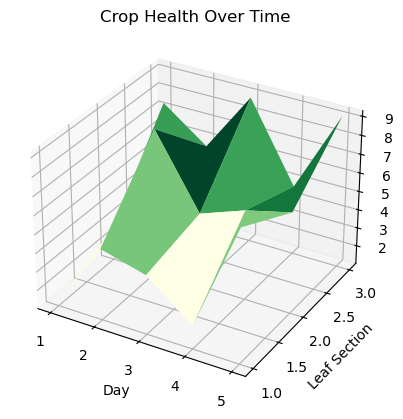

In [285]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

days = np.array([1, 2, 3, 4, 5])
leaf_sections = np.array([1, 2, 3])
severity = np.random.rand(5, 3) * 10

X, Y = np.meshgrid(days, leaf_sections)
Z = severity.T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='YlGn')
ax.set_xlabel('Day')
ax.set_ylabel('Leaf Section')
ax.set_zlabel('Severity')
plt.title('Crop Health Over Time')
plt.show()

#### Bar Chart of Diseases Detected Across Fields

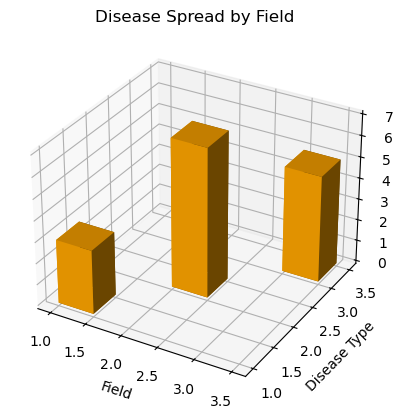

In [288]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = [1, 2, 3]  # Field ID
y = [1, 2, 3]  # Disease Type Index
z = [0]*3
dx = dy = 0.5
dz = [3, 7, 5]  # Disease Count

ax.bar3d(x, y, z, dx, dy, dz, color='orange')
ax.set_xlabel('Field')
ax.set_ylabel('Disease Type')
ax.set_zlabel('Occurrences')
plt.title('Disease Spread by Field')
plt.show()

#### Heatmap of Leaf Disease Severity

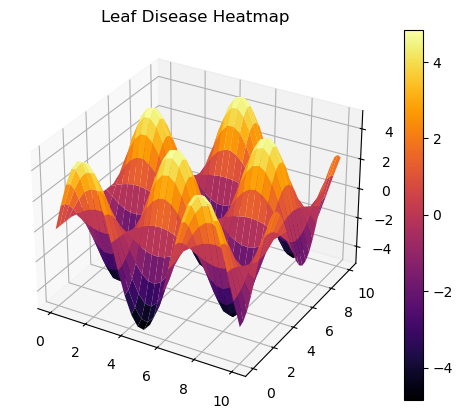

In [291]:
X, Y = np.meshgrid(np.linspace(0, 10, 30), np.linspace(0, 10, 30))
Z = np.sin(X) * np.cos(Y) * 5

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
heatmap = ax.plot_surface(X, Y, Z, cmap='inferno')
ax.set_title('Leaf Disease Heatmap')
fig.colorbar(heatmap)
plt.show()

#### Clustering of Crop Images in Feature Space (After CNN/PCA)

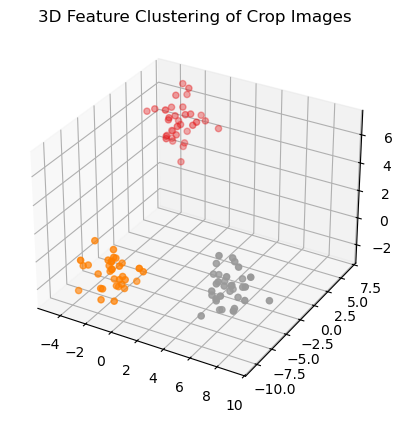

In [76]:
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D

X, y = make_blobs(n_samples=100, centers=3, n_features=3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='Set1')
ax.set_title('3D Feature Clustering of Crop Images')
plt.show()

#### Voice Input Visualization (MFCC Features Over Time)

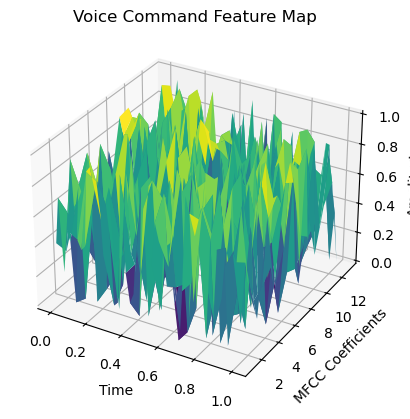

In [77]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Simulated MFCC features (time, coeff #, value)
time = np.linspace(0, 1, 50)
coeffs = np.arange(1, 14)
T, C = np.meshgrid(time, coeffs)
Z = np.random.rand(len(coeffs), len(time))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T, C, Z, cmap='viridis')
ax.set_xlabel('Time')
ax.set_ylabel('MFCC Coefficients')
ax.set_zlabel('Amplitude')
plt.title('Voice Command Feature Map')
plt.show()

#### Growth Visualization of Crops With Bounding Box Sizes (Object Detection)

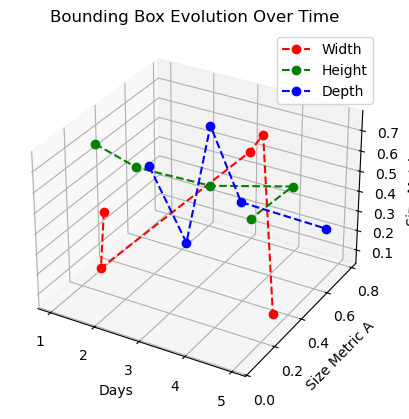

In [78]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

days = np.linspace(1, 5, 5)
width = np.random.rand(5)
height = np.random.rand(5)
depth = np.random.rand(5)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(days, width, height, 'ro--', label='Width')
ax.plot(days, height, depth, 'go--', label='Height')
ax.plot(days, depth, width, 'bo--', label='Depth')
ax.set_xlabel('Days')
ax.set_ylabel('Size Metric A')
ax.set_zlabel('Size Metric B')
ax.legend()
plt.title('Bounding Box Evolution Over Time')
plt.show()

### Pridection for this concepts

### image-Based Disease Prediction (CNN Model)
Use Convolutional Neural Networks (CNNs) to classify diseases based on crop images.

In [97]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import os

# ✅ Step 1: Make sure this path is 100% correct
dataset_path = (r"C:\Users\kavya\OneDrive\Desktop\kavya\PlantVillage")  # raw string avoids backslash issues

# ✅ Step 2: Create data generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_images = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_images = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# ✅ Step 3: Build and compile the model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_images.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Step 4: Train the model
model.fit(train_images, epochs=5, validation_data=val_images)

Found 33027 images belonging to 16 classes.
Found 8249 images belonging to 16 classes.
Epoch 1/5
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 840s 813ms/step - accuracy: 0.4951 - loss: 1.6137 - val_accuracy: 0.2301 - val_loss: 1.9605
Epoch 2/5
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 347s 336ms/step - accuracy: 0.5284 - loss: 1.0020 - val_accuracy: 0.1742 - val_loss: 2.7475
Epoch 3/5
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 347s 336ms/step - accuracy: 0.5509 - loss: 0.8896 - val_accuracy: 0.2376 - val_loss: 2.8751
Epoch 4/5
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 343s 332ms/step - accuracy: 0.5526 - loss: 0.8157 - val_accuracy: 0.1821 - val_loss: 3.3305
Epoch 5/5
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 347s 336ms/step - accuracy: 0.5542 - loss: 0.7823 - val_accuracy: 0.1349 - val_loss: 3.8676


#### Visualize a Few Training Images with Labels

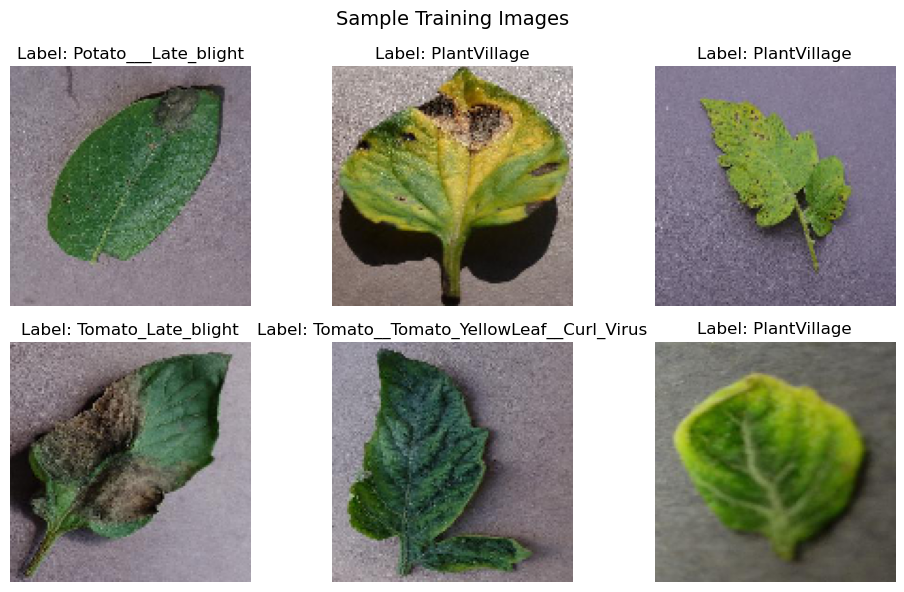

In [138]:
import numpy as np

class_names = list(train_images.class_indices.keys())
images, labels = next(train_images)

plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    label_index = np.argmax(labels[i])
    plt.title(f"Label: {class_names[label_index]}")
    plt.axis('off')

plt.suptitle("Sample Training Images", fontsize=14)
plt.tight_layout()
plt.show()

#### Voice Command Understanding (Intent Classification)
Use Natural Language Processing (NLP) to interpret farmer speech queries like “Why are leaves turning yellow?”

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

texts = ["yellow leaves", "brown spots", "wilting", "stunted growth"]
labels = ["Nitrogen Deficiency", "Fungal Infection", "Underwatering", "Pest Problem"]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)
model = LogisticRegression()
model.fit(X, labels)

query = vectorizer.transform(["why are my crops wilting"])
prediction = model.predict(query)
print("Predicted problem:", prediction[0])

Predicted problem: Underwatering


#### Real-Time Alerting with Threshold Prediction
Alert farmers when disease severity exceeds a critical level.

In [293]:
def detect_alert(severity_score, threshold=7.0):
    return "ALERT: High risk detected!" if severity_score > threshold else "Condition acceptable"

severity_score = 8.2
print(detect_alert(severity_score))

ALERT: High risk detected!


#### Yield Prediction Based on Crop Health & Weather
Use regression models if your dataset includes crop yield and weather data.

In [296]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Create sample data
data = {
    'rainfall': [40, 55, 60, 48, 72, 51],
    'temperature': [28, 31, 30, 29, 33, 27],
    'health_index': [0.7, 0.85, 0.9, 0.75, 0.6, 0.8],
    'yield': [2000, 2500, 2700, 2300, 1800, 2600]
}

df = pd.DataFrame(data)

# Step 2: Define features and target
X = df[['rainfall', 'temperature', 'health_index']]
y = df['yield']

# Step 3: Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predict yield
sample_input = [[50, 30, 0.8]]  # rainfall, temperature, health_index
predicted_yield = model.predict(sample_input)

print("Predicted yield:", predicted_yield[0])

Predicted yield: 2368.354430379747


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### Predicted vs. Actual Yield (Scatter Plot)
Helps visualize how close the predicted values are to the actual values.

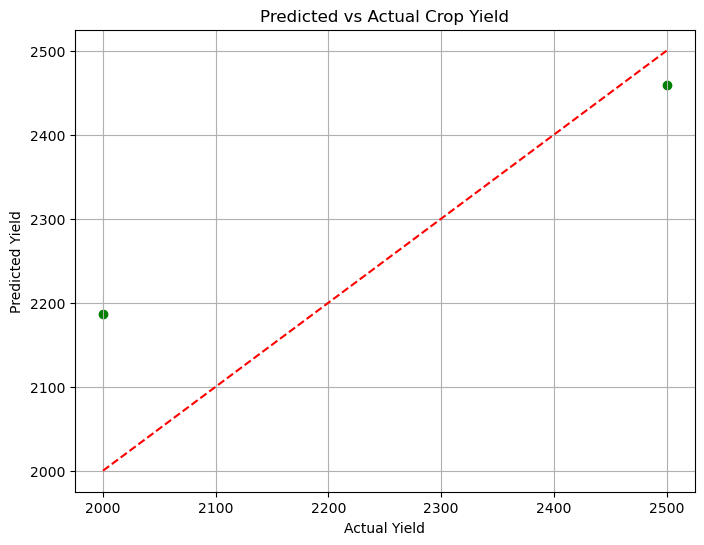

In [299]:
import matplotlib.pyplot as plt

# After predicting on test set
y_pred = model.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Predicted vs Actual Crop Yield')
plt.grid(True)
plt.show()

#### Feature Importance Visualization (for Linear Regression Coefficients)
See how each input feature affects the yield.

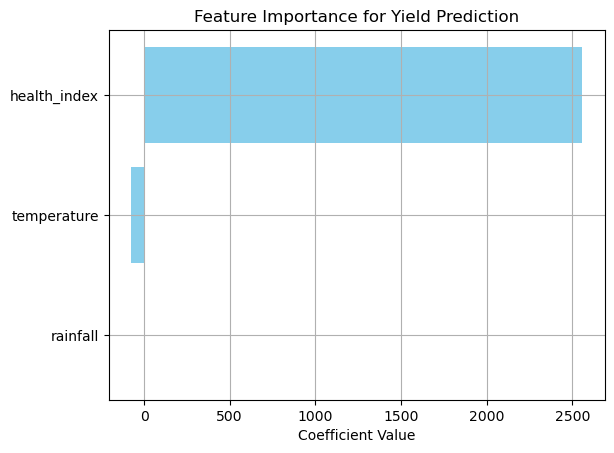

In [302]:
import numpy as np

feature_names = ['rainfall', 'temperature', 'health_index']
coefficients = model.coef_

plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance for Yield Prediction')
plt.grid(True)
plt.show()

#### 3D Visualization of Yield vs Rainfall & Temperature
Explore the relationship between key variables in three dimensions.

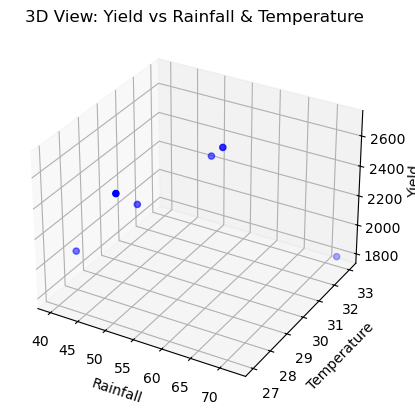

In [128]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['rainfall'], df['temperature'], df['yield'], c='blue', marker='o')

ax.set_xlabel('Rainfall')
ax.set_ylabel('Temperature')
ax.set_zlabel('Yield')
plt.title('3D View: Yield vs Rainfall & Temperature')
plt.show()